# À propos de ce livret

Ceci est la méthode XYZ : 
* Point 1
* Point 2
* Point 3
Pour une compréhension en profondeur de la méthode, ainsi que les techniques de modélisation, voici un supplément d'information : 

>NOMS (ANNEE). **NOM DE LA RECHERCHE.**


Liens pour davantage d'informations sur la méthode : 

[**Dépôt 1**](https://github.com/linxihui/NNLM) *Ceci est un paquet*  
[**Exemples d'implantation des méthodes**](https://rdrr.io/cran/NNLM/f/inst/doc/Fast-And-Versatile-NMF.pdf)  
[**Présentation sur le paquet**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6945623/)




## Prêt-à-l'utilisation

Ce livret est disponible pour tout usage d'imputation.

In [1]:
install_NNLM = FALSE # Indiquer si je dois installer NNLM ou non

pac = c("devtools", "R.matlab")

new_pac <- pac[!(pac %in% installed.packages()[,"Package"])]
if(length(new_pac)) 
    install.packages(new_pac, dependencies = TRUE)

if (install_NNLM == TRUE) {
    library(devtools)
    install_github('linxihui/NNLM')  
}

In [2]:
library(R.matlab)
library(NNLM)

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: 'R.matlab'


The following objects are masked from 'package:base':

    getOption, isOpen




In [3]:
setwd("C:/Users/amass/OneDrive/02_Education/02_Maitrise/Cours/PROJET_MAITRISE/application")

# Partie 1 : Données

## Chargement des données

In [4]:
# Tenseur de données
tensor <- readMat("data/Guangzhou-data-set/tensor.mat")
tensor <- tensor$tensor # Prendre l'array 
dim(tensor)

# Matrice de données aléatoires
random_matrix <- readMat("data/Guangzhou-data-set/random_matrix.mat")
random_matrix <- random_matrix$random.matrix
dim(random_matrix)

# Tenseur de données aléatoires
random_tensor <- readMat("data/Guangzhou-data-set/random_tensor.mat")
random_tensor <- random_tensor$random.tensor
dim(random_tensor)

[1] 214  61 144

[1] 214  61

[1] 214  61 144

## Format de données

In [5]:
# Indiquer si utiliser le jeu de données tronqué ou complet
petit_donnees = TRUE
# Indiquer si je veux travailler avec un tenseur ou une matrice
matrice = TRUE

capteurs = 50
jours = 10
sequences = dim(tensor)[3]   # (la séquence de temps du tenseur est pleine)

# Choix de données tronquées ou complètes
if (petit_donnees == TRUE){
    # Si l'utilisateur choisi de travailler avec les données tronquées 
    tensor = tensor[1:capteurs, 1:jours, 1:sequences, drop = FALSE]
    
    random_tensor = random_tensor[1:capteurs, 1:jours, 1:sequences, drop = FALSE]
    }

# Choix de matrice ou de tenseur
if(matrice == TRUE){
    # Si l'utilisateur choisi de travailler avec une matrice
    mat_dense <- array(tensor, c(dim(tensor[,,])[1], dim(tensor[,,])[2] * dim(tensor[,,])[3]))
    }

dim(tensor)
dim(mat_dense)

[1]  50  10 144

[1]   50 1440

## Scénarios de manquants


- Scénario de manquants aléatoires
- Scénario de manquants non-aléatoires

In [6]:
tx_manquant = 0.2
manquants_aleatoires = TRUE

# Manquants aléatoires
if(manquants_aleatoires == TRUE){
    print("Manquants aléatoires")
    mat_binaire <- round(random_tensor + 0.5 - tx_manquant)
    mat_binaire <- array(mat_binaire, c(dim(random_tensor[,,])[1], dim(random_tensor[,,])[2] * dim(random_tensor[,,])[3])) 
    dim(mat_binaire)
    
        # Création de la matrice de données manquantes (element-wise)
    mat_manq <- mat_dense * mat_binaire
    head(mat_manq)
}

# Manquants non-aléatoires
if(manquants_aleatoires == FALSE){
    print("Manquants non-aléatoires")
    tens_binaire <- array(0, dim(tensor))
    for (i1 in 1:dim(tensor)[1]){
        for (i2 in 1:dim(tensor)[2]){
            tens_binaire[i1, i2, ] <- round(random_matrix[i1, i2] + 0.5 - tx_manquant)
            }
        }
    mat_binaire <- array(tens_binaire, c(dim(tens_binaire)[1], dim(tens_binaire)[2] * dim(tens_binaire)[3]))
    dim(mat_binaire)
    
    # Création de la matrice de données manquants (element-wise)
    mat_manq <- mat_dense * mat_binaire
    head(mat_manq)
    }

[1] "Manquants aléatoires"


40.893,41.227,42.680,0.000,42.804,40.020,0.000,35.357,41.097,41.821,...,0.000,40.870,0.000,42.295,39.082,0.000,39.008,0.000,39.974,0.000
50.319,0.000,47.984,50.660,51.622,50.770,50.542,50.463,52.192,0.000,...,51.534,0.000,51.192,50.546,50.227,50.693,51.067,0.000,51.232,0.000
0.000,57.001,49.905,52.292,55.792,52.594,50.130,0.000,0.000,55.341,...,53.983,50.571,52.489,55.382,54.422,0.000,52.618,0.000,53.334,52.322
37.305,0.000,37.195,0.000,0.000,33.248,31.593,38.236,34.700,0.000,...,36.883,0.000,37.362,34.821,0.000,32.957,0.000,34.647,34.758,37.017
38.388,39.534,35.762,36.393,36.625,37.164,34.079,0.000,37.764,0.000,...,37.508,35.285,37.175,37.707,36.642,34.773,37.572,36.967,37.361,36.306
0.000,44.112,43.173,0.000,48.262,47.250,46.281,48.180,0.000,49.987,...,51.562,45.329,50.494,48.465,46.354,45.446,49.026,45.500,47.928,47.412


In [ ]:
# Position des éléments à imputer
index <- which(mat_binaire %in% c(0))

# Partie 2 : Modélisation

## Partie 2.2 : Entrainement du modèle

In [20]:
# Baseline NMF
rang = 2

mat_manq.nmf <- NNLM::nnmf(mat_manq, k = rang)
mat_manq.nmf # Sommaire de la manipulation

Non-negative matrix factorization:
   Algorithm: Sequential coordinate-wise descent
        Loss: Mean squared error
         MSE: 249.4755
         MKL: 6.878112
      Target: 124.7378
   Rel. tol.: 7.97e-05
Total epochs: 689
# Interation: 15
Running time:
   user  system elapsed 
   0.09    0.03    0.12 

In [21]:
# Imputation de données
mat_manq.hat.nmf <- with(mat_manq.nmf, W %*% H);
head(mat_manq.hat.nmf)

32.06273,35.36804,30.50520,26.54394,29.31689,36.28840,38.25219,30.40030,32.20623,36.55231,...,36.12182,27.62862,33.44012,37.53227,30.28440,32.78296,33.19557,28.37254,32.53523,32.19220
36.42552,39.95137,34.73774,31.34985,35.77600,41.01665,43.13225,34.91924,36.27625,41.58650,...,41.58370,31.58121,41.09161,42.55805,35.11216,36.83356,36.66998,32.51869,36.84530,35.79094
40.88790,45.62010,38.71737,31.15617,31.81388,46.74940,49.51407,37.90528,41.77547,46.47675,...,44.83071,34.79757,35.64773,48.04623,37.02516,42.73181,44.68456,35.53792,41.75447,42.81652
26.58123,29.54146,25.21157,20.85983,21.93409,30.28559,32.02441,24.83602,26.99995,30.24520,...,29.42157,22.71980,24.74645,31.19367,24.42837,27.57205,28.52104,23.24790,27.08527,27.43884
28.43941,31.33229,27.07175,23.74697,26.42312,32.15199,33.87426,27.02975,28.51369,32.43191,...,32.13261,24.53917,30.18757,33.27706,26.98204,29.00862,29.26727,25.21470,28.83866,28.42157
35.46372,39.05631,33.76354,29.68941,33.10899,40.07973,42.21994,33.73059,35.53617,40.44624,...,40.10442,30.61263,37.84400,41.49098,33.69206,36.14702,36.42870,31.46097,35.95401,35.39097


In [35]:
# Présentation de l'erreur au carré et du KL-divergence
sapply(
    X = list(
        NMF = mat_manq.hat.nmf[index]
        ),
    FUN = mse.mkl,
    obs = mat_dense[index])

,NMF
MSE,138.813354
MKL,2.285498


## Déterminer le rang par imputation de valeurs manquantes



(?)

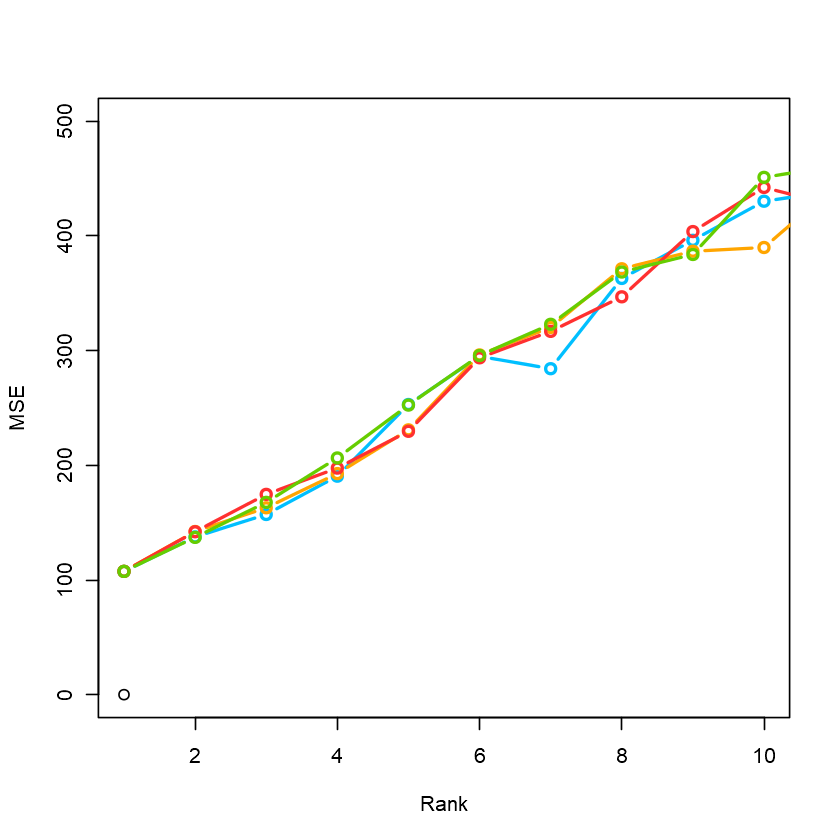

In [57]:
# Imputation avec les données manquantes
rang_max = 10


plot(0, xlim = c(1, rang_max), ylim = c(0, 500), xlab = "Rank", ylab = "MSE")
cols <- c('deepskyblue', 'orange', 'firebrick1', 'chartreuse3');
for (col in cols) {
    index <- which(mat_binaire %in% c(0));
    mat_manq <- mat_manq;
    err <- sapply(X = 1:rang_max,
                  FUN = function(k, A) {
                      z <- nnmf(A, k, verbose = FALSE);
                      
                      mean((with(z, W%*%H)[index] - mat_dense[index])^2)
                      },
                  A = mat_manq);
    invisible(lines(err, col = col, type='b', lwd = 2, cex = 1));
    }

## Partie 2.3 : Test du modèle

# Partie 3 : Sorties du modèle

# Partie 4 : Présentation des résultats